In [36]:
!pip3 install bertopic[visualization]

     |████████████████████████████████| 57 kB 3.6 MB/s             
     |████████████████████████████████| 86 kB 4.9 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 13.2 MB 89.3 MB/s            
     |████████████████████████████████| 6.4 MB 33.7 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 636 kB 85.5 MB/s            
     |████████████████████████████████| 1.1 MB 52.4 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311962 sha256=41b81f79134ccc6edb251aa26cd04b31b6bed05ea0786254fe5ef22fecd769a1
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=a51c

In [1]:
!pip3 install bertopic

In [2]:
from bertopic import BERTopic
import pandas as pd

In [3]:
df1= pd.read_csv('/content/sample_data/Top5percentCleaned.csv')

In [4]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,hashtag,id,created_at,lang,author_id,text,public_metricsretweet_count,public_metricsreply_count,public_metricslike_count,public_metricsquote_count,geoplace_id,hashtags extracted,CleanedTweet,interactionByWeights
0,0,170360,170360,NaN,6.790000e+17,2015-12-22T13:13:10.000Z,und,2.281731e+09,RT @MJIndustryNews: http://t.co/xWh0aBhY6S @Th...,5120,0,0,0,NaN,"WarOnDrugs, doj, Heroin, cannabis, dea",it mjindustrynews theweedmann willienelson tom...,15360
1,1,104495,104495,NaN,1.040000e+18,2018-09-02T14:35:51.000Z,en,7.852330e+07,The best offense is a good defense. Use the mo...,1894,250,5475,93,NaN,"liberals, DrugWar, IllegalInvasion, BuildTheWall.",the best offense is a good defense use the mon...,11657
2,2,283120,283120,NaN,9.290000e+17,2017-11-11T22:24:44.000Z,en,1.837262e+07,"Crack vs opioid addiction: 2 epidemics, but tr...",2520,0,13,0,NaN,"DrugWar, Resist, opiodepidemic",crack vs ovoid addition 2 epidemic but treated...,7573
3,3,282693,282693,NaN,9.310000e+17,2017-11-16T08:02:07.000Z,en,7.760000e+17,RT @movietvtechgeek: Crack vs opioid addiction...,2520,0,0,0,NaN,"o…, DrugWar, Resist",it movietvtechgeek crack vs ovoid addition 2 e...,7560
4,4,282580,282580,NaN,9.320000e+17,2017-11-18T11:35:13.000Z,en,8.240000e+17,RT @movietvtechgeek: Crack vs opioid addiction...,2520,0,0,0,NaN,"o…, DrugWar, Resist",it movietvtechgeek crack vs ovoid addition 2 e...,7560


In [5]:
df1.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis='columns', inplace=True)

In [6]:
df1.shape

(14555, 14)

In [7]:
new = df1['created_at'].str.split("-", n=1, expand=True)

In [8]:
df1["Year"] = new[0]

In [9]:
df1.head()

,hashtag,id,created_at,lang,author_id,text,public_metricsretweet_count,public_metricsreply_count,public_metricslike_count,public_metricsquote_count,geoplace_id,hashtags extracted,CleanedTweet,interactionByWeights,Year
0,NaN,6.790000e+17,2015-12-22T13:13:10.000Z,und,2.281731e+09,RT @MJIndustryNews: http://t.co/xWh0aBhY6S @Th...,5120,0,0,0,NaN,"WarOnDrugs, doj, Heroin, cannabis, dea",it mjindustrynews theweedmann willienelson tom...,15360,2015
1,NaN,1.040000e+18,2018-09-02T14:35:51.000Z,en,7.852330e+07,The best offense is a good defense. Use the mo...,1894,250,5475,93,NaN,"liberals, DrugWar, IllegalInvasion, BuildTheWall.",the best offense is a good defense use the mon...,11657,2018
2,NaN,9.290000e+17,2017-11-11T22:24:44.000Z,en,1.837262e+07,"Crack vs opioid addiction: 2 epidemics, but tr...",2520,0,13,0,NaN,"DrugWar, Resist, opiodepidemic",crack vs ovoid addition 2 epidemic but treated...,7573,2017
3,NaN,9.310000e+17,2017-11-16T08:02:07.000Z,en,7.760000e+17,RT @movietvtechgeek: Crack vs opioid addiction...,2520,0,0,0,NaN,"o…, DrugWar, Resist",it movietvtechgeek crack vs ovoid addition 2 e...,7560,2017
4,NaN,9.320000e+17,2017-11-18T11:35:13.000Z,en,8.240000e+17,RT @movietvtechgeek: Crack vs opioid addiction...,2520,0,0,0,NaN,"o…, DrugWar, Resist",it movietvtechgeek crack vs ovoid addition 2 e...,7560,2017


In [10]:
docs = df1['CleanedTweet'].to_list()


In [11]:
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [12]:
topic_model.get_topic_freq()

,Topic,Count
0,0,1705
1,1,704
2,2,665
3,3,346
4,4,337
...,...,...
77,76,20
78,77,20
79,78,17
80,79,16


In [13]:
topic_model.get_topic(50)

[('cocaine', 0.1495661649497713),
 ('ak', 0.1495661649497713),
 ('valdezvillareal', 0.1495661649497713),
 ('sentenced', 0.1495661649497713),
 ('charges', 0.1495661649497713),
 ('edgar', 0.1495661649497713),
 ('cnnvalencia', 0.14879472595491564),
 ('prison', 0.08115290591520466),
 ('amp', 0.02051854441694217),
 ('imprisonment', 0.0028109196661112975)]

In [14]:
topic_model.visualize_topics()

In [15]:
year = df1.Year.to_list()
docs = df1.CleanedTweet.to_list()

In [16]:
from bertopic import BERTopic
model = BERTopic(verbose=True)
topics, _ = model.fit_transform(docs)

Batches:   0%|          | 0/455 [00:00<?, ?it/s]

2021-12-07 00:07:59,303 - BERTopic - Transformed documents to Embeddings
2021-12-07 00:08:31,633 - BERTopic - Reduced dimensionality with UMAP
2021-12-07 00:08:32,099 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [17]:
topics_over_time = model.topics_over_time(docs, topics, year)
topics_over_time.to_csv("/content/sample_data/dynamic topics.csv")

11it [01:01,  5.56s/it]


In [18]:
from typing import List
import plotly.graph_objs as go
def visualize_topics_over_time(model,
                               topics_over_time: pd.DataFrame,
                               top_n_topics: int = None,
                               topics: List[int] = None,
                               width: int = 1250,
                               height: int = 450) -> go.Figure:
    """ Visualize topics over time

    Arguments:
        topic_model: A fitted BERTopic instance.
        topics_over_time: The topics you would like to be visualized with the
                          corresponding topic representation
        top_n_topics: To visualize the most frequent topics instead of all
        topics: Select which topics you would like to be visualized
        width: The width of the figure.
        height: The height of the figure.

    Returns:
        A plotly.graph_objects.Figure including all traces

    Usage:

    To visualize the topics over time, simply run:

    ```python
    topics_over_time = topic_model.topics_over_time(docs, topics, timestamps)
    topic_model.visualize_topics_over_time(topics_over_time)
    ```

    Or if you want to save the resulting figure:

    ```python
    fig = topic_model.visualize_topics_over_time(topics_over_time)
    fig.write_html("path/to/file.html")
    ```
    <iframe src="../../tutorial/visualization/trump.html"
    style="width:1000px; height: 680px; border: 0px;""></iframe>
    """
    colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#D55E00", "#0072B2", "#CC79A7"]

    # Select topics
    if topics:
        selected_topics = topics
    elif top_n_topics:
        selected_topics = model.get_topic_freq().head(top_n_topics + 1)[1:].Topic.values
    else:
        selected_topics = model.get_topic_freq().Topic.values

    # Prepare data
    topic_names = {key: value[:40] + "..." if len(value) > 40 else value
                   for key, value in model.topic_names.items()}
    topics_over_time["Name"] = topics_over_time.Topic.map(topic_names)
    data = topics_over_time.loc[topics_over_time.Topic.isin(selected_topics), :]

    # Add traces
    fig = go.Figure()
    for index, topic in enumerate(data.Topic.unique()):
        trace_data = data.loc[data.Topic == topic, :]
        topic_name = trace_data.Name.values[0]
        words = trace_data.Words.values
        fig.add_trace(go.Scatter(x=trace_data.Timestamp, y=trace_data.Frequency,
                                 mode='lines',
                                 marker_color=colors[index % 7],
                                 hoverinfo="text",
                                 name=topic_name,
                                 hovertext=[f'<b>Topic {topic}</b><br>Words: {word}' for word in words]))

    # Styling of the visualization
    fig.update_xaxes(showgrid=True)
    fig.update_yaxes(showgrid=True)
    fig.update_layout(
        yaxis_title="Frequency",
        title={
            'text': "<b>Topics over Time",
            'y': .95,
            'x': 0.40,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                size=22,
                color="Black")
        },
        template="simple_white",
        width=width,
        height=height,
        hoverlabel=dict(
            bgcolor="white",
            font_size=16,
            font_family="Rockwell"
        ),
        legend=dict(
        )
    )
    return fig

In [19]:
#Topic_starting_veryBegining
model.visualize_topics_over_time(topics_over_time, topics=[2,6,1,9,5,3,7])

In [20]:
model.visualize_topics_over_time(topics_over_time, topics= range(1,30))

In [21]:
model.visualize_topics_over_time(topics_over_time, topics= range(31,60))

In [22]:
model.visualize_topics_over_time(topics_over_time, topics= range(61,90))

In [23]:
#Topic_between_2011 to 2021_max_freq
model.visualize_topics_over_time(topics_over_time, topics=[3,5,7,9,12,14,17,22,26,77])

In [1]:
!pip install --upgrade pip

!pip install --upgrade jupyter notebook

!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 13.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 9.9 MB 12.1 MB/s            
     |████████████████████████████████| 428 kB 92.9 MB/s            
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.6 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; pytho

     |████████████████████████████████| 1.7 MB 14.1 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     |████████████████████████████████| 11.3 MB 76.2 MB/s            
     |████████████████████████████████| 15.7 MB 20.1 MB/s            
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=74bcc1f4d59bf2c65b7a55dcf5bdc0e6f6cc986f4b6f6100201e8dde524af6da
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dep

In [1]:
!pip install chart-studio
from chart_studio import plotly

     |████████████████████████████████| 64 kB 2.2 MB/s             


In [2]:
!pip install spacy-langdetect
!pip install language-detector
!pip install symspellpy
!pip install sentence-transformers

     |████████████████████████████████| 998 kB 11.2 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993430 sha256=91a4dd774e67e92653051ea00cf3a81531462513b4d62093b66366bba17d25d6
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect
  Preparing metadata (setup.py) ... done
  Created wheel for language-detector: filename=language_detector-5.0.2-py3-none-any.whl size=7053 sha256=2a85c968b56551d1e9883f921e50d5d2738e3bdc98d651841c9c0e078ff8a2d8
  Stored in directory: /root/.cache/pip/wheels/12/40/73/a0765d65e793332b79dfe6c34c713e7c0066ea785191b3f50a
Successfully built language-detector
     |████████████████████████████████| 2.6 MB 14.4 MB/s            
     |████████████████████████████████| 125 kB 91.6 MB/s            
     |████████████████████████████████| 78 kB 4.7 MB/s             
  Preparing metadata (setup.py) 

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/content/sample_data'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [4]:
#importing all dependencies.
import os
import json
import pandas as pd
from tqdm import tqdm
import numpy as np
from nltk.corpus import wordnet
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [5]:
import os
import pandas as pd
import numpy as np
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import datetime
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import nltk

In [6]:
import nltk; nltk.download('stopwords')

# Run in terminal or command prompt
!python3 -m spacy download en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 12.0 MB 15.2 MB/s            
  Preparing metadata (setup.py) ... done
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [7]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
#import pyLDAvis

#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [8]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [11]:
meta = pd.read_csv("/content/sample_data/dynamic topics.csv")
print(meta.Words.unique())
meta.head()
print(meta.shape)

['spent, fentanyl, felony, fig, federal'
 'per, student, inmate, spend, costs'
 '1920s, prohibition, govgaryjohnson, japaneseinternment, violation'
 'ladygaga, controversial, warondr, smoking, think'
 'drugwarmovie, never, drugs, state, propaganda'
 'selling, painless, adriangrenier, drugs, money'
 'risk, door, localisation, support, fatally'
 'incredible, far, film, failed, theculturehigh'
 'stretch, nickclegg, think, dont, breakthetaboo'
 'jailed, largest, theaters, worlds, families'
 'proof, legalizeit2012, colossalfailure, yeson502, antwerp'
 'zzzquil, nyquil, sleep, abusing, dangerous'
 'dollars, tax, oliviawilde, arrests, marijuana'
 'teachers, school, prisoners, drug, class'
 'decriminalisation, petrous, work, doesn, stimulant'
 'ladygaga, controversial, debate, smoking, marijuana'
 'prisons, policies, drugwar, war, crime'
 'global, issue, politicians, parties, join'
 'broken, model, business, why, return'
 'cards, henrique, explain, read, readbyrichard'
 'bestoftheleft, prisons

In [12]:
# Convert to list
data = meta.Words.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['spent, fentanyl, felony, fig, federal']


In [13]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['spent', 'fentanyl', 'felony', 'fig', 'federal']]


In [14]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['spent', 'fentanyl', 'felony', 'fig', 'federal']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [15]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [16]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['spend', 'fentanyl', 'felony', 'fig', 'federal']]


In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]


In [18]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1)],
 [(8, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1)],
 [(12, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(20, 1), (21, 1), (22, 1)],
 [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1)],
 [(10, 1), (28, 1), (29, 1), (30, 1)],
 [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1)],
 [],
 [(36, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1)],
 [(12, 1), (43, 1), (44, 1), (45, 1)],
 [(46, 1), (47, 1), (48, 1)],
 [(49, 1)],
 [(50, 1), (51, 1), (52, 1), (53, 1)],
 [(54, 1), (55, 1), (56, 1), (57, 1), (58, 1)],
 [(59, 1), (60, 1), (61, 1), (62, 1)],
 [],
 [(63, 1)],
 [(52, 1), (64, 1), (65, 1), (66, 1)],
 [(67, 1), (68, 1), (69, 1)],
 [(70, 1), (71, 1), (72, 1)],
 [(73, 1), (74, 1), (75, 1)],
 [(76, 2), (77, 1), (78, 1), (79, 1)],
 [(80, 1)],
 [(81, 1), (82, 1), (83, 1), (84, 1), (85, 1)],
 [(25, 1), (26, 1), (27, 1), (86, 1)],
 [(87, 1), (88, 1), (89, 1), (90, 1)],
 [(12, 1), (91, 1), (92, 1

In [19]:
id2word[0]

'federal'

In [20]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('federal', 1), ('felony', 1), ('fentanyl', 1), ('fig', 1), ('spend', 1)]]

In [21]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [22]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.121*"peddler" + 0.104*"drug" + 0.092*"inconvenience" + 0.092*"regretted" '
  '+ 0.074*"crime" + 0.029*"propaganda" + 0.029*"never" + 0.029*"state" + '
  '0.029*"prison" + 0.015*"libertarianism"'),
 (1,
  '0.092*"extortion" + 0.031*"think" + 0.031*"breakthetaboo" + '
  '0.031*"stoptheharm" + 0.031*"evidence" + 0.031*"criminalisation" + '
  '0.031*"stretch" + 0.031*"supporter" + 0.031*"order" + 0.031*"nickclegg"'),
 (2,
  '0.089*"inmate" + 0.053*"editorial" + 0.053*"wap" + 0.053*"outlet" + '
  '0.037*"sinaloa" + 0.037*"revolt" + 0.037*"free" + 0.037*"allot" + '
  '0.037*"rate" + 0.037*"population"'),
 (3,
  '0.048*"politician" + 0.048*"party" + 0.048*"hope" + 0.025*"splinter" + '
  '0.025*"progress" + 0.025*"abuse" + 0.025*"dangerous" + 0.025*"sleep" + '
  '0.025*"jeffsession" + 0.025*"happen"'),
 (4,
  '0.044*"tacticaldoglive" + 0.030*"dog" + 0.030*"policestate" + 0.022*"law" + '
  '0.015*"room" + 0.015*"justice" + 0.015*"worry" + 0.015*"open" + '
  '0.015*"system" + 0.015*"le

In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.745861888655766

Coherence Score:  0.5356698202638319


In [24]:
# Visualize the topics
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.147177  0.146890       1        1  11.586183
18     0.019536 -0.261150       2        1  10.872916
6      0.318021  0.094099       3        1   8.247933
0     -0.020826  0.109462       4        1   6.522298
16    -0.033590  0.071376       5        1   5.474369
8     -0.010180 -0.011439       6        1   5.101121
13    -0.009542 -0.007109       7        1   5.095554
2     -0.008795 -0.031258       8        1   5.015534
5     -0.013951 -0.009524       9        1   4.685815
3     -0.013941 -0.011385      10        1   4.157225
7     -0.005550 -0.048770      11        1   4.113557
10    -0.008168 -0.008144      12        1   3.762150
11    -0.009895 -0.004218      13        1   3.659319
17    -0.011764 -0.004064      14        1   3.581218
15    -0.005429 -0.038792      15        1   3.458509
14    -0.010074 -0.006450      16        1   3.300935
12    -0.011905  0.005164      17        1   3.110312
9      0.000155  0.024388      18        1   2.871850
19    -0.008077 -0.004462      19        1   2.841243
1     -0.008848 -0.004613      20        1   2.541959, topic_info=          Term      Freq     Total Category  logprob  loglift
12        drug  8.000000  8.000000  Default  30.0000  30.0000
276    peddler  4.000000  4.000000  Default  29.0000  29.0000
88         end  2.000000  2.000000  Default  28.0000  28.0000
220  tendemand  4.000000  4.000000  Default  27.0000  27.0000
104      start  3.000000  3.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
7      student  0.026153  1.013760  Topic20  -6.1741   0.0148
8    violation  0.026153  1.023828  Topic20  -6.1741   0.0049
9      smoking  0.026153  0.993383  Topic20  -6.1741   0.0351
11     warondr  0.026153  0.993383  Topic20  -6.1741   0.0351
12        drug  0.026153  8.845495  Topic20  -6.1741  -2.1515

[903 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
218       3  0.795926  abolitionist
36       10  0.923093         abuse
212       2  0.582743        addict
103       6  0.680792      advocate
76        7  0.604290         agree
...     ...       ...           ...
268      11  0.655512          word
244       1  0.694978         worry
174      12  0.750347         write
184       9  0.540523          year
224       1  0.694978         yeson

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 19, 7, 1, 17, 9, 14, 3, 6, 4, 8, 11, 12, 18, 16, 15, 13, 10, 20, 2])

In [25]:
!wget "http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip"
!unzip "/content/mallet-2.0.8.zip"

--2021-12-06 23:24:08--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2021-12-06 23:24:09--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  8.62MB/s    in 1.8s    

2021-12-06 23:24:11 (8.62 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  /content/mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: 

In [26]:
mallet_path = '/content/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [27]:
#Topic Evolution
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(12,
  [('advocate', 0.1),
   ('join', 0.1),
   ('criminalisation', 0.1),
   ('tendemand', 0.05),
   ('sanction', 0.05),
   ('tablet', 0.05),
   ('drugwar', 0.05),
   ('execution', 0.05),
   ('call', 0.05),
   ('wrong', 0.05)]),
 (17,
  [('model', 0.09375),
   ('break', 0.09375),
   ('stupid', 0.09375),
   ('tendemand', 0.09375),
   ('tacticaldoglive', 0.09375),
   ('order', 0.0625),
   ('end', 0.0625),
   ('shaunattwood', 0.03125),
   ('bonfire', 0.03125),
   ('jail', 0.03125)]),
 (0,
  [('education', 0.18181818181818182),
   ('job', 0.15151515151515152),
   ('drug', 0.06060606060606061),
   ('excuse', 0.06060606060606061),
   ('cry', 0.030303030303030304),
   ('painless', 0.030303030303030304),
   ('twitter', 0.030303030303030304),
   ('family', 0.030303030303030304),
   ('strike', 0.030303030303030304),
   ('adriangreni', 0.030303030303030304)]),
 (11,
  [('heroin', 0.058823529411764705),
   ('equiparacionya', 0.058823529411764705),
   ('year', 0.058823529411764705),
   ('hundred',

In [28]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [31]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is

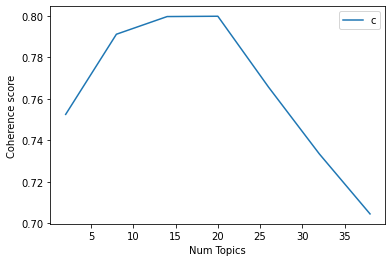

In [33]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [34]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.7525
Num Topics = 8  has Coherence Value of 0.7912
Num Topics = 14  has Coherence Value of 0.7997
Num Topics = 20  has Coherence Value of 0.7999
Num Topics = 26  has Coherence Value of 0.7657
Num Topics = 32  has Coherence Value of 0.7335
Num Topics = 38  has Coherence Value of 0.7045


In [35]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.174*"crime" + 0.087*"commit" + 0.043*"tax" + 0.043*"stupid" + '
  '0.043*"regret" + 0.043*"bandage" + 0.043*"erikvoorhee" + 0.043*"theater" + '
  '0.043*"death" + 0.043*"militarized"'),
 (1,
  '0.182*"legalize" + 0.091*"incredible" + 0.091*"editorial" + 0.091*"stupid" '
  '+ 0.045*"flight" + 0.045*"mexican" + 0.045*"group" + 0.045*"org" + '
  '0.045*"hope" + 0.045*"sadly"'),
 (2,
  '0.167*"start" + 0.083*"end" + 0.083*"safe" + 0.083*"advocate" + '
  '0.042*"finger" + 0.042*"daughter" + 0.042*"harm" + 0.042*"shaunattwood" + '
  '0.042*"fatally" + 0.042*"private"'),
 (3,
  '0.156*"politician" + 0.094*"check" + 0.031*"sole" + 0.031*"confound" + '
  '0.031*"illicit" + 0.031*"legalize" + 0.031*"vanish" + 0.031*"justice" + '
  '0.031*"injustice" + 0.031*"family"'),
 (4,
  '0.167*"drugwar" + 0.167*"education" + 0.133*"stop" + 0.067*"join" + '
  '0.067*"theculturehigh" + 0.033*"supporter" + 0.033*"substance" + '
  '0.033*"execution" + 0.033*"inmate" + 0.033*"oppose"'),
 (5,
  '0.120*